In [0]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import data from csv files into dataframes 
false_data = pd.read_csv("fakeJavier.csv", encoding = 'latin-1')
true_data = pd.read_csv("TrueJavier1.30.20_Training.csv", encoding = 'latin-1')

In [0]:
# Combine both dataframes into one
spoofed_data = false_data.append(true_data, ignore_index=True)
spoofed_data.columns

Index(['YYYY-MM-DD', 'HH:MM:SS (UTC)', 'speed over ground (Knots)',
       'magnetic variation', 'latitude', 'lat direction', 'longitude',
       'lon direction', 'sat tracked', 'horizontal dilution', 'altitude',
       'alt units', 'height of geoid', 'geoid units', 'sat in view',
       'num. nmeas', 'SNR', 'label'],
      dtype='object')

In [0]:
display(spoofed_data.head(n = 3))

In [0]:
spoofed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 18 columns):
YYYY-MM-DD                   2548 non-null object
HH:MM:SS (UTC)               2548 non-null object
speed over ground (Knots)    2490 non-null float64
magnetic variation           0 non-null float64
latitude                     2490 non-null float64
lat direction                2490 non-null object
longitude                    2490 non-null float64
lon direction                2490 non-null object
sat tracked                  2548 non-null int64
horizontal dilution          2548 non-null float64
altitude                     2490 non-null float64
alt units                    2490 non-null object
height of geoid              2490 non-null float64
geoid units                  2490 non-null object
sat in view                  2548 non-null int64
num. nmeas                   2548 non-null int64
SNR                          2548 non-null object
label                        2548 non-null

In [0]:
# remove rows with missing data 
spoofed_data = spoofed_data[spoofed_data["sat tracked"] != 0]
spoofed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490 entries, 0 to 2547
Data columns (total 20 columns):
YYYY-MM-DD                   2490 non-null object
HH:MM:SS (UTC)               2490 non-null object
speed over ground (Knots)    2490 non-null float64
magnetic variation           0 non-null float64
latitude                     2490 non-null float64
lat direction                2490 non-null object
longitude                    2490 non-null float64
lon direction                2490 non-null object
sat tracked                  2490 non-null int64
horizontal dilution          2490 non-null float64
altitude                     2490 non-null float64
alt units                    2490 non-null object
height of geoid              2490 non-null float64
geoid units                  2490 non-null object
sat in view                  2490 non-null int64
num. nmeas                   2490 non-null int64
SNR                          2490 non-null object
label                        2490 non-null

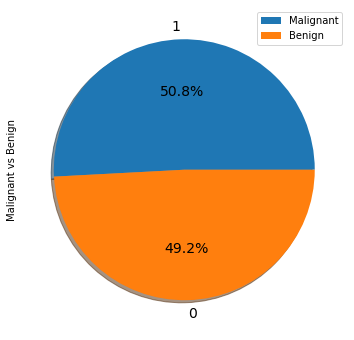

In [0]:
# Display what percentage of our data is spoofed and non-spoofed 
spoofed_data["label"].value_counts().plot(kind = 'pie', figsize = (6, 6), fontsize=14, autopct = '%1.1f%%', shadow = True)
plt.ylabel("Malignant vs Benign")
plt.legend(["Malignant", "Benign"])
plt.show()

In [0]:
from ast import literal_eval
import statistics as stats

def computeAverage(snrValues):
  # convert the string to a list of values
  snrValues = literal_eval(snrValues)
  # type cast each value to an integer
  snrValues = [int(val) for val in snrValues if val is not '']
  snrValues = np.asarray(snrValues)
  # return the average SNR value in the list
  return np.average(snrValues)

def computeStd(snrValues):
  # convert the string to a list of values
  snrValues = literal_eval(snrValues)
  # type cast each value to an integer
  snrValues = [int(val) for val in snrValues if val is not '']
  snrValues = np.asarray(snrValues)
  # return the std SNR value of the list
  return np.std(snrValues)

# print(computeAverage(spoofed_data["SNR"][1]))
# Create two new rows 'average SNR' and 'SNR std' 
spoofed_data["average SNR"] = spoofed_data["SNR"].apply(computeAverage)
spoofed_data["SNR std"] = spoofed_data["SNR"].apply(computeStd)

46.0


In [0]:
spoofed_data.columns

Index(['YYYY-MM-DD', 'HH:MM:SS (UTC)', 'speed over ground (Knots)',
       'magnetic variation', 'latitude', 'lat direction', 'longitude',
       'lon direction', 'sat tracked', 'horizontal dilution', 'altitude',
       'alt units', 'height of geoid', 'geoid units', 'sat in view',
       'num. nmeas', 'SNR', 'label', 'average SNR', 'SNR std'],
      dtype='object')

In [0]:
spoofed_data["average SNR"].describe()

count    2490.000000
mean       39.273612
std         6.781544
min        15.444444
25%        32.600000
50%        41.130952
75%        46.000000
max        48.818182
Name: average SNR, dtype: float64

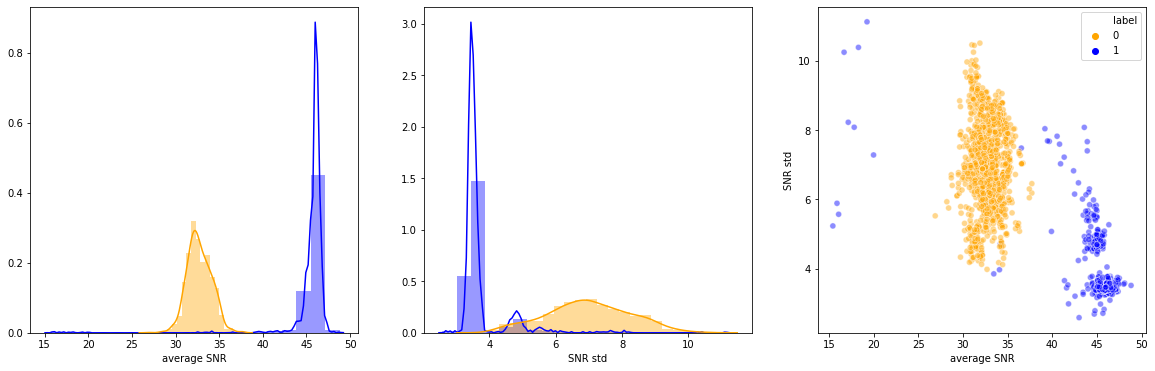

In [0]:
f, ax = plt.subplots(1, 3, figsize=(20,6))

sns.distplot(spoofed_data[spoofed_data["label"] == 1]["average SNR"], color="blue", bins = 20, ax = ax[0])
sns.distplot(spoofed_data[spoofed_data["label"] == 0]["average SNR"], color="orange", bins = 20, ax = ax[0])
# ax[0].set_xlabel("Average SNR for True and False Location")

sns.distplot(spoofed_data[spoofed_data["label"] == 1]["SNR std"], color="blue", bins = 20, ax = ax[1])
sns.distplot(spoofed_data[spoofed_data["label"] == 0]["SNR std"], color="orange", bins = 20, ax = ax[1])

sns.scatterplot(x="average SNR", y="SNR std", hue="label", palette=dict({0: "orange", 1: "blue"}), alpha=0.45, data=spoofed_data, ax=ax[2])

plt.show()

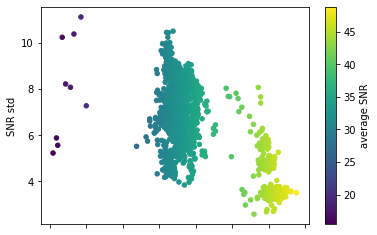

In [0]:
ax = spoofed_data.plot.scatter(x="average SNR",y="SNR std",c="average SNR",colormap="viridis")
# ax = sns.scatterplot(x="average SNR", y="SNR std", hue="average SNR",data=spoofed_data)
# ax = sns.scatterplot(x="average SNR", y="SNR std", hue="SNR std",data=spoofed_data)
# ax = sns.scatterplot(x="average SNR", y="SNR std", hue="label",data=spoofed_data)

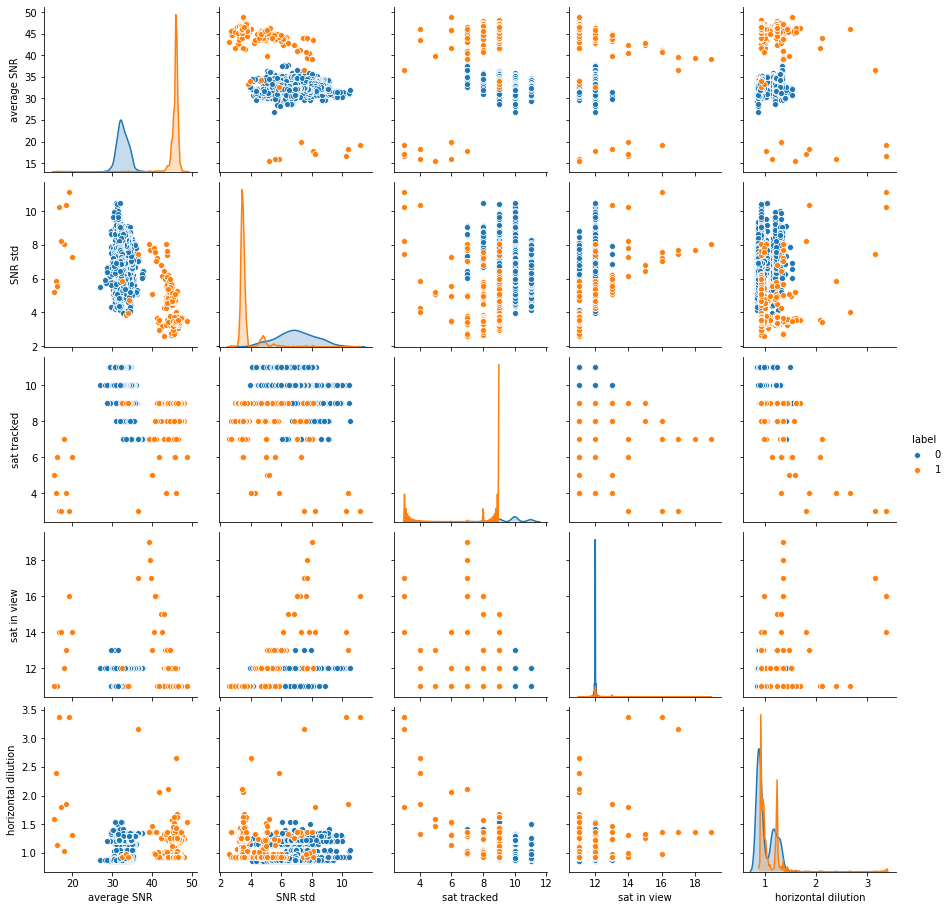

In [0]:
sns.pairplot(spoofed_data[["label","average SNR", "SNR std", "sat tracked", "sat in view", "horizontal dilution"]], hue="label", height=2.5);

In [0]:
# references for plotting 
# https://seaborn.pydata.org/tutorial/axis_grids.html
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

In [0]:
# Split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spoofed_data[["average SNR", "SNR std", "sat tracked", "sat in view"]], spoofed_data[["label"]], test_size=0.30, random_state=42)

print("The size of total samples:", len(spoofed_data["label"]))
print("The size of trainng samples:", X_train.shape)
print("The size of testing samples:", X_test.shape)
print("The size of spoofed data in training samples:", len(y_train[y_train["label"] == 1]))
print("The size of non-spoofed data in training samples:", len(y_train[y_train["label"] == 0]))

The size of total samples: 2490
The size of trainng samples: (1743, 4)
The size of testing samples: (747, 4)
The size of spoofed data in training samples: 896
The size of non-spoofed data in training samples: 847


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Testing one sample from the testing set
print(knn.predict([X_test.iloc[6]]))
print(knn.predict_proba([X_test.iloc[6]]))
print(y_test.iloc[6])

[0]
[[1. 0.]]
label    0
Name: 2387, dtype: int64


In [0]:
print("Mean accuracy on the given test data and labels:", knn.score(X_test, y_test))
print("Parameters for this estimator:\n", knn.get_params())

Mean accuracy on the given test data and labels: 0.9959839357429718
Parameters for this estimator:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


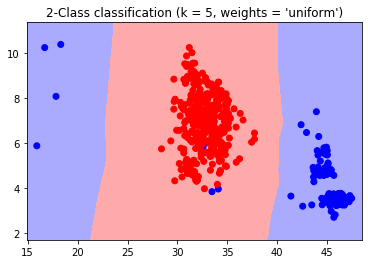

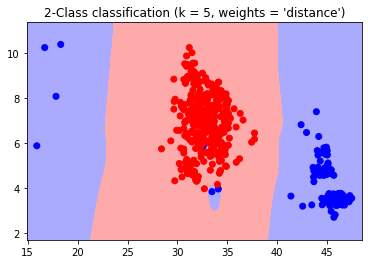

In [0]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5
# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = X_test.to_numpy()
X = X[:, :2]

y = y_test.to_numpy()
y.resize((747, ))

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()